<a href="https://colab.research.google.com/github/hijyun/2020-DDWU-Bigdata-idea-challenge/blob/master/Prediction/kills%EB%A1%9C_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 패키지 설정

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import collections
import pandas as pd
from sklearn import datasets

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier # 결정 트리
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀

from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier # 앙상블 

from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score  # ROC곡선 그리기

from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV, cross_val_score  # 하이퍼파라미터 튜닝, 교차타당도

In [8]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 데이터 읽기

In [9]:
df1 = pd.read_csv('https://raw.githubusercontent.com/hijyun/TIL/main/tanker_kills.csv')

In [10]:
df1 = df1.dropna(subset=['win'])

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241 entries, 0 to 2240
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              2241 non-null   int64  
 1   map_name_x            2241 non-null   object 
 2   team                  2241 non-null   object 
 3   win                   2241 non-null   float64
 4   key                   2241 non-null   object 
 5   esports_match_id      2241 non-null   int64  
 6   map_name_y            2241 non-null   object 
 7   team_name             2241 non-null   object 
 8   Accretion Kills       1061 non-null   float64
 9   Charge Kills          459 non-null    float64
 10  Critical Hit Kills    1083 non-null   float64
 11  Earthshatter Kills    524 non-null    float64
 12  Environmental Kills   365 non-null    float64
 13  Fire Strike Kills     666 non-null    float64
 14  Grappling Claw Kills  441 non-null    float64
 15  Gravitic Flux Kills  

In [12]:
df1.isnull().sum()

match_id                   0
map_name_x                 0
team                       0
win                        0
key                        0
esports_match_id           0
map_name_y                 0
team_name                  0
Accretion Kills         1180
Charge Kills            1782
Critical Hit Kills      1158
Earthshatter Kills      1717
Environmental Kills     1876
Fire Strike Kills       1575
Grappling Claw Kills    1800
Gravitic Flux Kills     1342
Graviton Surge Kills    1928
High Energy Kills       1874
Jump Pack Kills         1432
Knockback Kills          671
Melee Kills             1454
Minefield Kills         2088
Multikills              1297
Objective Kills           40
Piledriver Kills        1809
Primal Rage Kills       1596
Self-Destruct Kills     1730
Solo Kills              1351
Weapon Kills            1369
Whole Hog Kills         2130
dtype: int64

In [20]:
X = df1.drop(['win','team','match_id','esports_match_id','map_name_x','key','map_name_y','team_name'],axis=1)
y = df1['win']

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241 entries, 0 to 2240
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Accretion Kills       1061 non-null   float64
 1   Charge Kills          459 non-null    float64
 2   Critical Hit Kills    1083 non-null   float64
 3   Earthshatter Kills    524 non-null    float64
 4   Environmental Kills   365 non-null    float64
 5   Fire Strike Kills     666 non-null    float64
 6   Grappling Claw Kills  441 non-null    float64
 7   Gravitic Flux Kills   899 non-null    float64
 8   Graviton Surge Kills  313 non-null    float64
 9   High Energy Kills     367 non-null    float64
 10  Jump Pack Kills       809 non-null    float64
 11  Knockback Kills       1570 non-null   float64
 12  Melee Kills           787 non-null    float64
 13  Minefield Kills       153 non-null    float64
 14  Multikills            944 non-null    float64
 15  Objective Kills      

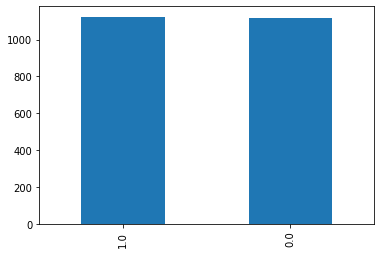

In [22]:
df1['win'].value_counts().plot.bar()

In [23]:
df1.shape

(2241, 30)

# 전처리 및 데이터 분할

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # 범주형 변수를 0부터 시작하는 정수형 숫자로 변환
y = le.fit_transform(y)


In [25]:
y

array([0, 1, 0, ..., 1, 0, 1])

In [26]:
X = X.fillna(0)

## train data , test data split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

# 모델

In [41]:
logistic = LogisticRegression(solver='liblinear',penalty='l2',C=0.1,random_state=1)
tree = DecisionTreeClassifier(max_depth=5,criterion='entropy',random_state=1)
knn = KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')

voting_estimators = [('logistic', logistic), ('tree', tree), ('knn', knn)]

voting = VotingClassifier(estimators = voting_estimators,voting='soft')

forest = RandomForestClassifier(criterion='entropy',n_estimators=700,random_state=1)


adaboost = AdaBoostClassifier(base_estimator=tree, 
                                n_estimators=100,
                                learning_rate = 0.01, 
                                random_state=42)
lgb = LGBMClassifier(random_state=42)
xgb = XGBClassifier(tree_method='hist',random_state=41)

clf_labels = ['Knn','Decision tree',  'Majority voting','Random forest','Ada boost','XGB','LIGHTGBM']

all_clf = [knn, tree, voting, forest,adaboost,xgb,lgb]

### AUC 검정

In [42]:
for clf, label in zip(all_clf, clf_labels):
  scores = cross_val_score(estimator=clf,X=X_train,y=y_train,cv=2,scoring='roc_auc')
  print("ROC AUC: %0.3f (+/- %0.3f) [%s]"
  % (scores.mean(), scores.std(), label))

ROC AUC: 0.695 (+/- 0.004) [Knn]
ROC AUC: 0.692 (+/- 0.001) [Decision tree]
ROC AUC: 0.737 (+/- 0.006) [Majority voting]
ROC AUC: 0.727 (+/- 0.009) [Random forest]
ROC AUC: 0.700 (+/- 0.016) [Ada boost]
ROC AUC: 0.747 (+/- 0.009) [XGB]
ROC AUC: 0.713 (+/- 0.010) [LIGHTGBM]


### ROC 커브

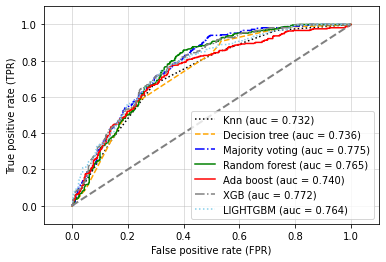

In [43]:
colors = ['black', 'orange', 'blue', 'green','red','gray','skyblue']
linestyles = [':', '--', '-.', '-','solid','dashdot','dotted']
for clf, label, clr, ls \
        in zip(all_clf, clf_labels, colors, linestyles):

  clf.fit(X_train, y_train)
  y_pred = clf.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                  y_score=y_pred)
  roc_auc = auc(x=fpr, y=tpr) # 교차검증 X
  plt.plot(fpr, tpr,
            color=clr,
            linestyle=ls,
            label='%s (auc = %0.3f)' % (label, roc_auc))
  
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
          linestyle='--',
          color='gray',
          linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()

### 정오 분류표로 검정

In [31]:
voting.fit(X_train, y_train)
y_pred = voting.predict(X_test)

print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())
print('정확도: %.3f' % accuracy_score(y_test, y_pred))
print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

잘못 분류된 샘플 개수: 205
정확도: 0.695
정밀도: 0.696
재현율: 0.686
F1: 0.691


# 특성중요도

In [45]:
forest.fit(X,y)

features = X.columns.values

In [46]:
zip(forest.feature_importances_,features)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


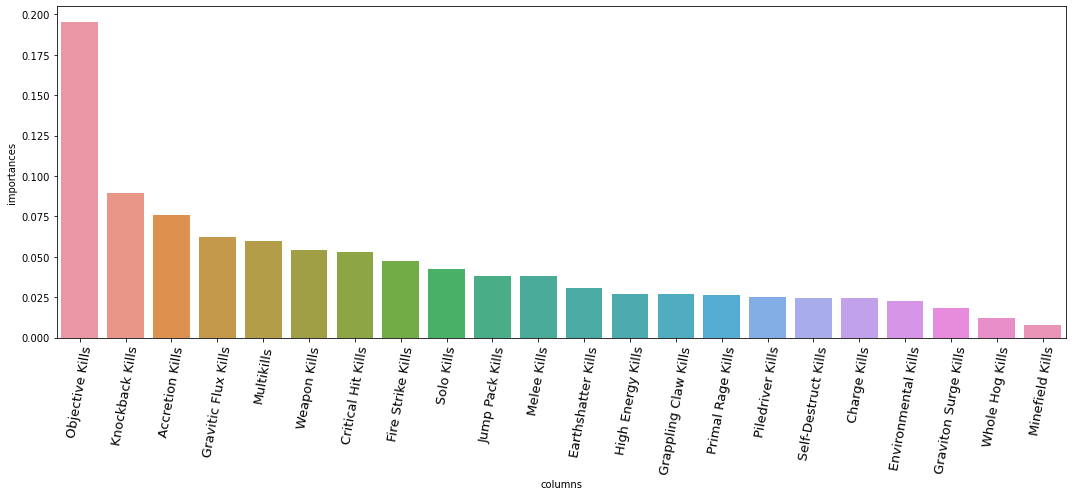

In [47]:

import seaborn as sns
import matplotlib.pyplot as plt

feature_importance = forest.feature_importances_
# plot
df_fi = pd.DataFrame({'columns':X.columns, 'importances':feature_importance})
df_fi = df_fi[df_fi['importances'] > 0] # importance가 0이상인 것만 
df_fi = df_fi.sort_values(by=['importances'], ascending=False)

fig = plt.figure(figsize=(15,7))
ax = sns.barplot(df_fi['columns'], df_fi['importances'])
ax.set_xticklabels(df_fi['columns'], rotation=80, fontsize=13)
plt.tight_layout()
plt.show()

# 튜닝

## adaboost

In [32]:
adaboost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=5, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1, splitter='best'),
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 5,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__presort': 'deprecated',
 'base_estimator__random_state': 

In [39]:
parms = {'n_estimators': [100,200,300]
             }


grid = GridSearchCV(estimator=adaboost, 
                    param_grid=parms,
                    cv=10,
                    scoring='roc_auc',
                    iid=False)

grid.fit(X_train,y_train)

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
  print("%0.3f +/- %0.3f %r" % (grid.cv_results_['mean_test_score'][r],
        grid.cv_results_['std_test_score'][r] / 2.0,
        grid.cv_results_['params'][r]))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


0.718 +/- 0.016 {'n_estimators': 100}
0.712 +/- 0.018 {'n_estimators': 200}
0.711 +/- 0.017 {'n_estimators': 300}


In [40]:
print('최적의 파타미터: %s' % grid.best_params_)
print('ACU: %.3f' % grid.best_score_)

최적의 파타미터: {'n_estimators': 100}
ACU: 0.718


## voting

In [35]:
parms = {'logistic__C':[0.001,0.1,100.0],
         'tree__max_depth' :  [1,2,3,4,5],
         'knn__n_neighbors':[1,2,3,4,5]}


grid = GridSearchCV(estimator=voting, 
                    param_grid=parms,
                    cv=10,
                    scoring='roc_auc',
                    iid=False)


In [36]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=10, error_score=nan,
             estimator=VotingClassifier(estimators=[('logistic',
                                                     LogisticRegression(C=0.1,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                       

In [ ]:
for r, _ in enumerate(grid.cv_results_['mean_test_score']):
  print("%0.3f +/- %0.3f %r" % (grid.cv_results_['mean_test_score'][r],
        grid.cv_results_['std_test_score'][r] / 2.0,
        grid.cv_results_['params'][r]))


0.768 +/- 0.034 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 1}
0.780 +/- 0.034 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 2}
0.789 +/- 0.033 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 3}
0.796 +/- 0.034 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 4}
0.806 +/- 0.035 {'knn__n_neighbors': 1, 'logistic__C': 0.001, 'tree__max_depth': 5}
0.781 +/- 0.031 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 1}
0.790 +/- 0.031 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 2}
0.799 +/- 0.033 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 3}
0.802 +/- 0.036 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 4}
0.812 +/- 0.034 {'knn__n_neighbors': 1, 'logistic__C': 0.1, 'tree__max_depth': 5}
0.782 +/- 0.030 {'knn__n_neighbors': 1, 'logistic__C': 100.0, 'tree__max_depth': 1}
0.792 +/- 0.030 {'knn__n_neighbors': 1, 'logistic__C': 100.0, 'tree__max_depth': 2}
0.

In [ ]:
print('최적의 파타미터: %s' % grid.best_params_)
print('ACU: %.3f' % grid.best_score_)


최적의 파타미터: {'knn__n_neighbors': 5, 'logistic__C': 0.1, 'tree__max_depth': 5}
ACU: 0.853
